# YOLO Object Detection with OpenCV

This tutorial fully shows how to use YOLOv3 to perform Object detection on images. This tutorial will demonstrate how to load YOLO, the pretrained weights, and draw bounding boxes on the images.

## Imports
We will not be using the GPU in this lab since we are working with very few images. We also will not use Pytorch but instead OpenCV.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Loading YOLO model
We need to load the YOLO network in OpenCV. In this assignment, we will not be re-training the network so we also need to download the weights. Please follow the instructions in the README to see the command to download the weights. To load the network, we also need a config file which is provided in this repository.

In [4]:
network = cv2.dnn.readNetFromDarknet('yolo_files/yolov3.cfg', 'yolo_files/yolov3.weights')
layers = network.getLayerNames()
yolo_layers = [layers[i - 1] for i in network.getUnconnectedOutLayers()]

## Load an Image
We now need to load an image to perform the task on. We will read the image using OpenCV ```imread()```

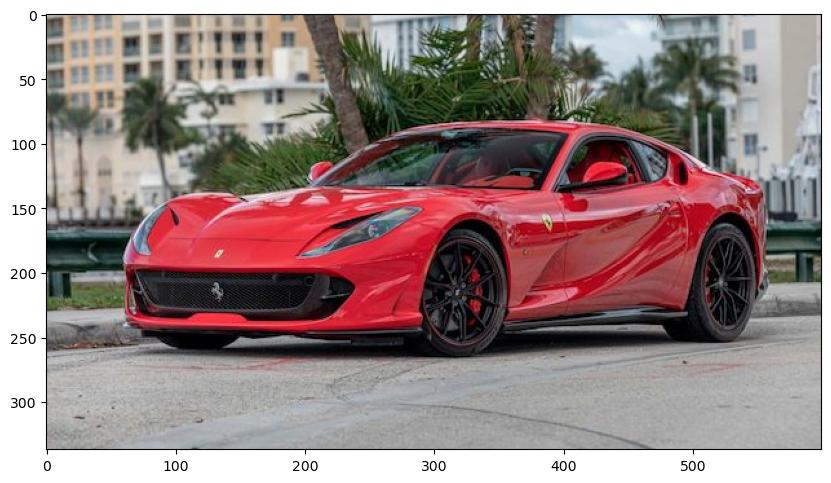

In [6]:
%matplotlib inline
image = cv2.imread('imgs/sample.jpg')
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## Convert Image to Blob
We need to change the image into a 'blob', which is the input of the network. A blob is a 4D numpy array object (images, channels, width, height).


In [42]:
input_blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)

## Pass image through the network

In [ ]:
network.setInput(input_blob)
output = network.forward(yolo_layers)

print(type(output))  # <class 'list'>
print(type(output[0]))  # <class 'numpy.ndarray'>

## Define Variables for drawing on image

In [44]:
bounding_boxes = []
confidences = []
classes = []
probability_minimum = 0.5
threshold = 0.3
h, w = image.shape[:2]

## Get bounding boxes, confidences, and classes

In [45]:
for result in output:
    for detection in result:
        scores = detection[5:]
        class_current = np.argmax(scores)
        confidence_current = scores[class_current]
        if confidence_current > probability_minimum:
            box_current = detection[0:4] * np.array([w, h, w, h])
            x_center, y_center, box_width, box_height = box_current.astype('int')
            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))
            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            confidences.append(float(confidence_current))
            classes.append(class_current)

## Draw bounding boxes and information on image

In [47]:
results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)
coco_labels = 80
np.random.seed(42)
colours = np.random.randint(0, 255, size=(coco_labels, 3), dtype='uint8')

if len(results) > 0:
    for i in results.flatten():
        x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
        box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]
        colour_box = [int(j) for j in colours[classes[i]]]
        cv2.rectangle(image, (x_min, y_min), (x_min + box_width, y_min + box_height),
                      colour_box, 5)
        text_box = 'conf: {:.4f}'.format(confidences[i])
        cv2.putText(image, text_box, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX, 1.5, colour_box, 5)

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()